<a href="https://colab.research.google.com/github/lucianoribeirogyn/colby_abacus/blob/main/abaco2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Esse script serve para
#1) Ler os pontos do abaco 02 gerados a partir do aplicativo Web Plot Digitizer 4.6,
#2) Encontrar as equaçṍes das curvas 
#3) Redesenhar o gráfico com as equações encontradas 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
#32 Curvas do ábaco 02
curves = ['0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','1.4','1.8','2.2','2.6','3.0','3.65','4.30','5.0','6.0','7.0','8.0','9.0','10.0','12.0','14.0','16.0','18.0','20.0','22.0','24.0','26.0','28.0','30.0']

arquivo_dados = []
for x in curves:
  arquivo_dados.append(pd.read_csv(x+'.csv', sep = ';'))

velocidade = []
concentracao = []
curve = []
cont = 0
for x in curves:
  #axis x
  velocidade_aux = pd.Series(arquivo_dados[cont].iloc[:,0]).tolist()
  velocidade.append(velocidade_aux)   
  #axis y
  concentracao_aux = pd.Series(arquivo_dados[cont].iloc[:,1]).tolist()
  concentracao.append(concentracao_aux)
  curve.append(np.polyfit(np.log10(velocidade_aux), np.log10(concentracao_aux), 1))
  cont += 1


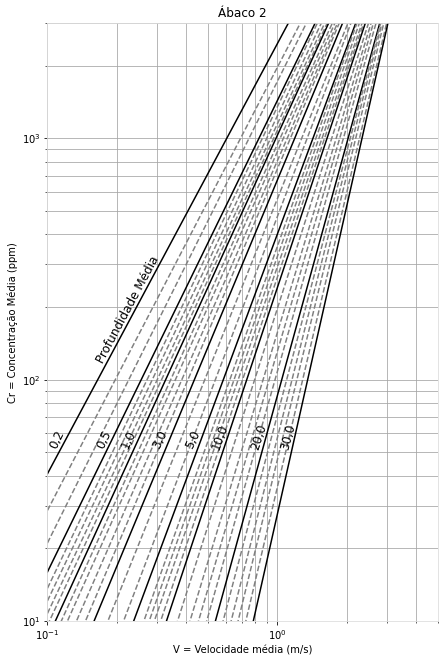

In [3]:
#esse script serve para desenhar o abaco 02 baseado nos pontos que foram gerados a partir da equaçao acima
velocidade_new = []
concentracao_new = []
cont = 0
for x in curves:
  velocidade_aux = []
  concentracao_aux = []
  for x in np.arange(0.1, 5.1, 0.1):
      velocidade_aux.append(x)
      aux = curve[cont][0]*math.log10(x)+curve[cont][1]
      concentracao_aux.append(pow(10, aux))
  velocidade_new.append(velocidade_aux)
  concentracao_new.append(concentracao_aux)
  cont += 1

# Display grid
plt.figure(figsize=[7, 11])

ax = plt.axes()
ax.set_facecolor("white")

ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

# Linear X axis, Logarithmic Y axis
cont = 0;
for x in curves:
  if ((x=='0.2') or (x=='0.5') or (x=='1') or (x=='3.0') or (x=='5.0') or (x=='10.0') or (x=='20.0') or (x=='30.0')):
    plt.semilogy(velocidade_new[cont], concentracao_new[cont], color='k')
  else:
    plt.semilogy(velocidade_new[cont], concentracao_new[cont], color='grey', linestyle='--')
  cont += 1

plt.text(0.1, 52, '0,2', fontsize=12, rotation=65)
plt.text(0.16, 52, '0,5', fontsize=12, rotation=65)
plt.text(0.16, 118, 'Profundidade Média', fontsize=12, rotation=62)
plt.text(0.205, 52, '1,0', fontsize=12, rotation=65)
plt.text(0.28, 52, '3,0', fontsize=12, rotation=65)
plt.text(0.39, 52, '5,0', fontsize=12, rotation=65)
plt.text(0.505, 52, '10,0', fontsize=12, rotation=70)
plt.text(0.75, 52, '20,0', fontsize=12, rotation=72)
plt.text(1.01, 52, '30,0', fontsize=12, rotation=75)

plt.ylim([10,3000])
plt.xlim([0.10,5])

# Provide the title for the semilog plt
plt.title('Ábaco 2')
# Give x axis label for the semilog plt
plt.xlabel('V = Velocidade média (m/s)')
# Give y axis label for the semilog plt
plt.ylabel("Cr = Concentração Média (ppm)")
# Display the semilog plt

plt.loglog()
plt.grid(True, which="both", ls="-", color='0.65', axis='both')
plt.savefig('abaco2.png')
plt.show()